In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)


In [91]:
# Create Dataframe
path = "Bank Customer Churn Prediction.csv"
df = pd.read_csv(path)
# Print shape of dataset
print(df.shape)

(10000, 12)


In [92]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

# Data Cleaning Overview


1. [Handling Missing Values](#Handling-Missing-Values)
2. [Handling Duplicates](#Handling-Duplicates)
3. [Check Data Types](#Check-Data-Types)
4. [Understand the Dataset](#Understand-the-Dataset)

### check null values

In [47]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

features_with_na

[]

### Handling Duplicates

In [48]:
df.duplicated().sum()

0

##### remove 'customer_id' column in the dataframe

In [49]:
df.drop(['customer_id'], inplace=True, axis=1)

In [50]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


#####  Feature Engineering

###### Numerical Features

In [51]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 9


###### Categorical Features

In [52]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 2


###### Discrete Features

In [53]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 5


###### Continuous Features

In [54]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 4


#### Spilt X and Y

In [55]:
X = df.drop('churn', axis=1)
y = df['churn']

In [56]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

#### Feature Transformation

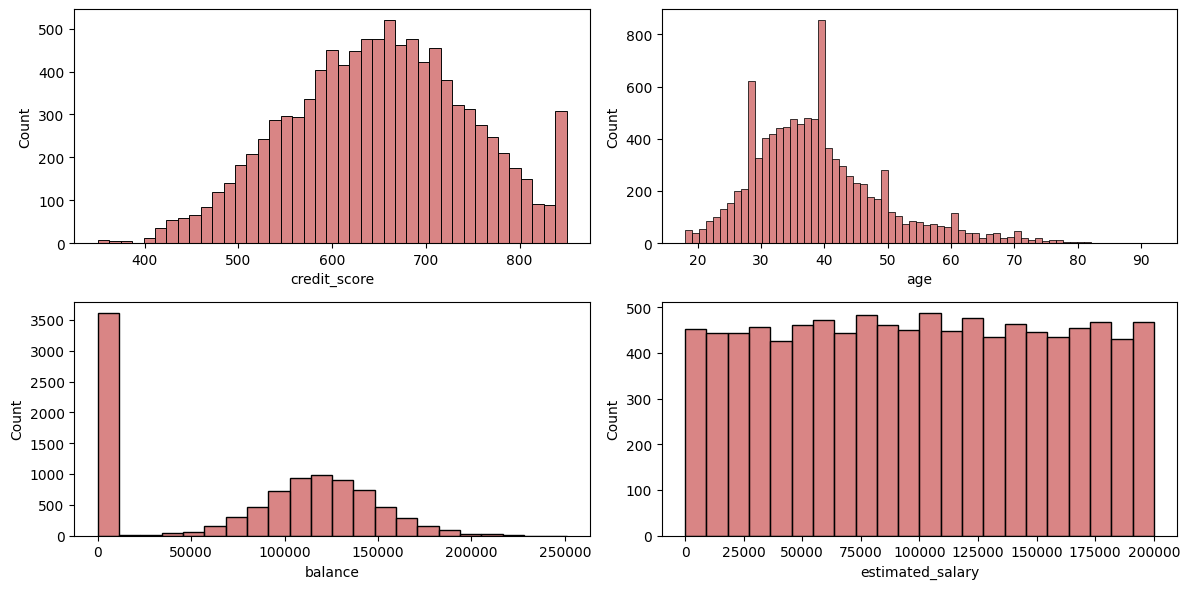

In [57]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(['credit_score','age','balance', 'estimated_salary']):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

##### checking skewness

In [58]:
# Check Skewness
X[continuous_features].skew(axis=0, skipna=True)

credit_score       -0.071607
age                 1.011320
balance            -0.141109
estimated_salary    0.002085
dtype: float64

### Skewness Analysis of Dataset Features

Understanding the skewness of various features in a dataset is crucial for data preprocessing and modeling. Skewness indicates the asymmetry of the distribution of values in a feature relative to the mean. Below is the skewness analysis for key features in our dataset:

#### Feature: Credit Score
- ***Skewness Score:*** -0.071607
- ***Interpretation:*** The distribution of Credit Score values is slightly negatively skewed, indicating a minor concentration of data on the higher end. However, the skewness is close to 0, suggesting that the distribution is almost symmetrical with minor deviations.

#### Feature: Age
- ***Skewness Score:*** 1.011320
- ***Interpretation:*** Age exhibits a right-skewed distribution, indicated by a skewness score above 1. This suggests that the dataset contains more younger individuals, with the distribution tail extending towards older ages.

#### Feature: Balance
- ***Skewness Score:*** -0.141109
- ***Interpretation:*** The Balance feature is slightly negatively skewed, similar to Credit Score, though the skewness is close to 0. This indicates a slight concentration of data values towards the higher balance end, suggesting minor asymmetry in the distribution.

#### Feature: Estimated Salary
- ***Skewness Score:*** 0.002085
- ***Interpretation:*** With a skewness score very close to 0, the distribution of Estimated Salary values is nearly perfectly symmetrical. This indicates that the values do not significantly lean towards higher or lower salaries, suggesting an even distribution across the dataset.

By analyzing the skewness of these features, we can gain insights into the distribution of our data, guiding us in preprocessing steps such as normalization or transformation if necessary to improve model performance.


### Apply Power Transformer to Check if it can reduces the outliers

In [59]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['age']
X_copy = pt.fit_transform(X[transform_features])

In [60]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)

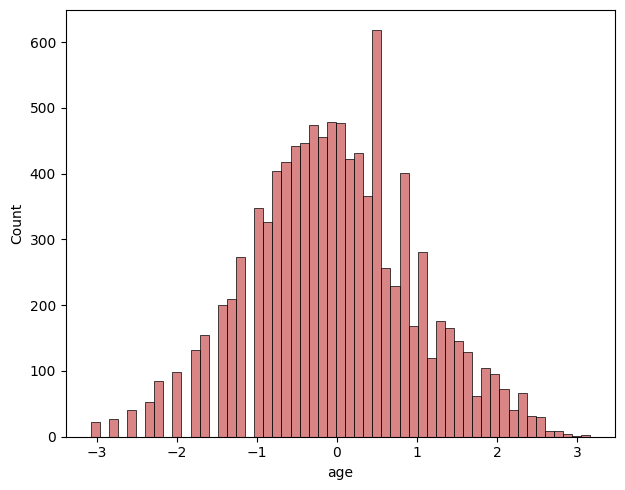

In [61]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(transform_features):
    plt.subplot(1, 2, i+1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [62]:
X_copy.skew(axis=0, skipna=True)

age   -0.002495
dtype: float64

In [63]:
for feature in cat_features:
    print(feature,':', df[feature].nunique())

country : 3
gender : 2


#### Feature Encoding and Scaling

##### Selecting number features for preprocessing

In [64]:
num_features = list(X.select_dtypes(exclude="object").columns)
num_features

['credit_score',
 'age',
 'tenure',
 'balance',
 'products_number',
 'credit_card',
 'active_member',
 'estimated_salary']

#### Preprocessing Using Column Transformer

In [65]:
or_columns = ['gender'] #ordinal encoding-  columns which has only two dictinct values like (yes, no)
oh_columns = ['country'] #one-hot encoding- columns which has more than two different values
transform_columns = ['age'] 

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [66]:
X = preprocessor.fit_transform(X)

In [67]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  0.64609167,
         0.97024255,  0.02188649],
       [ 0.        ,  0.        ,  1.        , ..., -1.54776799,
         0.97024255,  0.21653375],
       [ 1.        ,  0.        ,  0.        , ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 0.        ,  1.        ,  0.        , ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.        ,  0.        ,  0.        , ...,  0.64609167,
        -1.03067011, -1.07636976]])

### Classification

In [68]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

#### Train Test Split

In [69]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((9784, 13), (2447, 13))

In [71]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [72]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [73]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [74]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

In [75]:
base_model_report =evaluate_models(X=X_res, y=y_res, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9579
- F1 score: 0.9618
- Precision: 0.9593
- Recall: 0.9643
- Roc Auc Score: 0.9572


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9183
- F1 score: 0.9265
- Precision: 0.9151
- Recall: 0.9382
- Roc Auc Score: 0.9161


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9305
- F1 score: 0.9389
- Precision: 0.9413
- Recall: 0.9366
- Roc Auc Score: 0.9295
----------------------------------
Model performance for Test set
- Accuracy: 0.9224
- F1 score: 0.9295
- Precision: 0.9268
- Recall: 0.9323
- Roc Auc Score: 0.9213


Logistic Regression
Model performance for Training 

In [76]:
base_model_report

,Model Name,Accuracy
0,Random Forest,0.957908
4,K-Neighbors Classifier,0.955864
6,CatBoosting Classifier,0.955456
5,XGBClassifier,0.954638
2,Gradient Boosting,0.922354
1,Decision Tree,0.918267
7,Support Vector Classifier,0.908459
8,AdaBoost Classifier,0.904781
3,Logistic Regression,0.789947


#### Hyperparemeter Tuning

In [77]:
#Initialize few parameter for Hyperparamter tuning
xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

catboost_params = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 500, 1000],
    'l2_leaf_reg': [1, 3, 5]
}

In [78]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params),
    ("CatBoosting", CatBoostClassifier(), catboost_params)
]

In [79]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
0:	learn: 0.5704354	total: 14.8ms	remaining: 14.8s
1:	learn: 0.4981887	total: 27.1ms	remaining: 13.5s
2:	learn: 0.4335636	total: 41ms	remaining: 13.6s
3:	learn: 0.3831625	total: 52.7ms	remaining: 13.1s
4:	learn: 0.3535588	total: 63.8ms	remaining: 12.7s
5:	learn: 0.3304622	total: 75.3ms	remaining: 12.5s
6:	learn: 0.3106668	total: 88ms	remaining: 12.5s
7:	learn: 0.2942556	total: 99.3ms	remaining: 12.3s
8:	learn: 0.2802765	total: 112ms	remaining: 12.3s
9:	learn: 0.2697059	total: 124ms	remaining: 12.3s
10:	learn: 0.2599046	total: 138ms	remaining: 12.4s
11:	learn: 0.2525737	total: 150ms	remaining: 12.4s
12:	learn: 0.2455220	total: 162ms	remaining: 12.3s
13:	learn: 0.2412347	total: 173ms	remaining: 12.2s
14:	learn: 0.2371446	total: 184ms	remaining: 

In [83]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost']),
    "Catboost Classifier": CatBoostClassifier(**model_param['CatBoosting']),
}
tuned_report =evaluate_models(X=X_res, y=y_res, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9542
- F1 score: 0.9586
- Precision: 0.9516
- Recall: 0.9658
- Roc Auc Score: 0.9530


KNeighborsClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9796
- F1 score: 0.9817
- Precision: 0.9661
- Recall: 0.9978
- Roc Auc Score: 0.9776


XGBClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9575
- F1 score: 0.9615
- Precision: 0.9566
- Recall: 0.9665
- Roc Auc Score: 0.9565


0:	learn: 0.5754269	total: 5.51ms	rem

In [84]:
tuned_report

,Model Name,Accuracy
1,KNeighborsClassifier,0.979567
3,Catboost Classifier,0.962403
2,XGBClassifier,0.957499
0,Random Forest Classifier,0.954230


In [85]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.9796
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1103
           1       0.97      1.00      0.98      1344

    accuracy                           0.98      2447
   macro avg       0.98      0.98      0.98      2447
weighted avg       0.98      0.98      0.98      2447



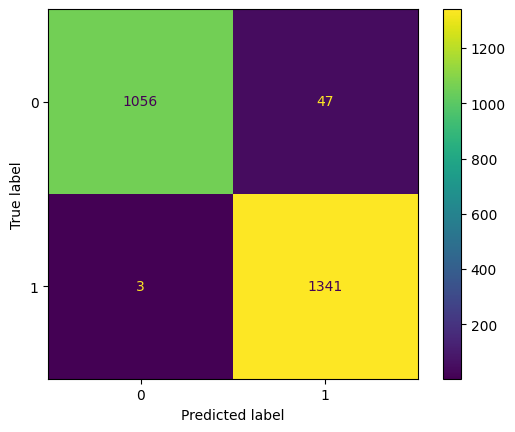

In [86]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

### Best Model is K-Nearest Neighbor(KNN) with Accuracy 98%